<a href="https://colab.research.google.com/github/justjstine/CCADMACL_EXERCISES_COM232/blob/main/Exercise%201B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

In [ ]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [ ]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [ ]:
df.head(5)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [ ]:
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [ ]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [ ]:
df1 = df[['AnnualIncome','SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [ ]:
df1.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

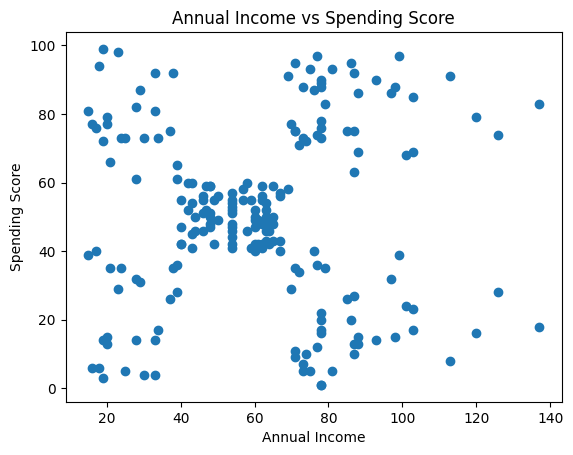

In [ ]:
plt.scatter(df1['AnnualIncome'],df1['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 181363.59595959607
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73679.78903948837
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 37265.86520484345
For cluster = 7, SSE/WCSS is 30259.657207285458
For cluster = 8, SSE/WCSS is 25050.832307547524
For cluster = 9, SSE/WCSS is 21862.09267218289
For cluster = 10, SSE/WCSS is 19657.783608703947


Text(0, 0.5, 'WCSS')

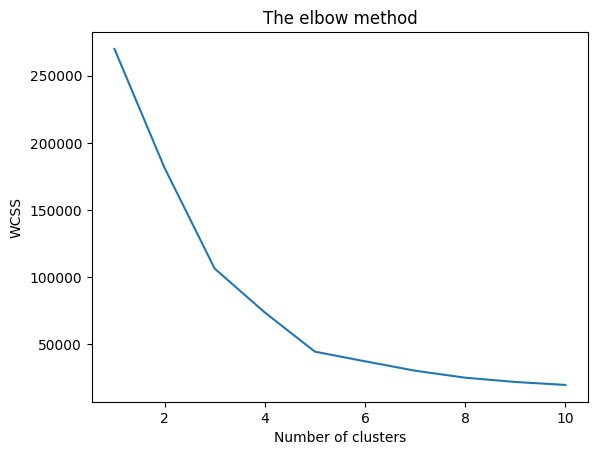

In [ ]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    print("For cluster = {}, SSE/WCSS is {}".format(i, wcss[-1]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [ ]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(df1)

cluster_Kmeans.labels_
df1['cluster'] = cluster_Kmeans.labels_
df1.head(10)

/tmp/ipython-input-1409904961.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AnnualIncome,SpendingScore,cluster
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0
5,17,76,2
6,18,6,0
7,18,94,2
8,19,3,0
9,19,72,2


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

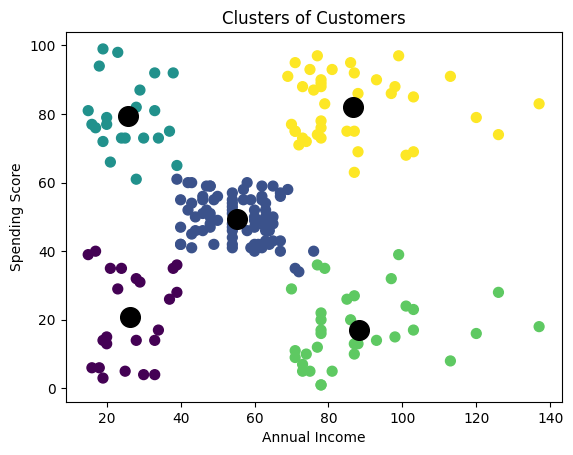

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]]


In [ ]:
plt.scatter(df1['AnnualIncome'], df1['SpendingScore'], c=df1['cluster'], s=50, cmap='viridis')

centers = cluster_Kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.show()

print(centers)



## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

*   The bottom right or the color green cluster shows customers that earn more but does not spend much at the mall.
*  The cluster of top left or the color cyan shows customers that spend more at the establishment but have a lower income, it could be various reasons such as lack of budgeting or they spends on more services or products that they want rather than need.
*   Cluster of color green represents a potential target for promotions since these customers have the financial capacity to spend more and this could be an oppurtunity to introduce a product or service that is appealing to them.
*   Cluster for high income and low spender (green), can be focused on products that are "premium" or exclusive offers for them to encourage them to spend more time and money in the mall. The top left or cyan color cluster shows customers that lower income but have higher spending, it could be they prefer products that are branded, potential loyalty platform can be introduced to maintain their spending score. As for low income and low spending cluster which is bottom left (violet), they spend on products that are only needed and prices in the lower end. A budget friendly gimmick or bundled products could be eye catching for them, similarly to the average/medium income and spending clusters. Lastly, the top right cluster or customers that have high income and high spending, introducing more "luxurious" products similar to products that are appealing for them.






## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [ ]:
df1 = df[['Age','AnnualIncome','SpendingScore']]
df1.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Visualize using a 3D scatter plot. `(5 pts)`

In [80]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(df1)
pred_kmeans = model_kmeans.labels_

print(pred_kmeans)

cluster_means = df1.groupby(pred_kmeans).mean()
print(cluster_means)

fig = px.scatter_3d(df, x='Age', y='AnnualIncome', z='SpendingScore', color=pred_kmeans)
fig.show()

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 4 3 2 3 2 3 4 2 2 2 4 2 2 4 4 2 4 4 2 4 4 2 4 4 4 2 4 4 2 2 4 4 4 4
 4 2 4 4 2 4 4 4 4 4 2 4 4 2 4 4 4 2 4 4 2 2 4 2 4 2 2 4 4 4 4 2 4 4 4 4 4
 2 4 2 2 2 4 4 4 4 4 4 4 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
         Age  AnnualIncome  SpendingScore
0  32.692308     86.538462      82.128205
1  40.394737     87.000000      18.631579
2  33.750000     40.645833      36.166667
3  25.521739     26.304348      78.565217
4  52.942308     55.288462      49.730769


## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

*   Each clusters shows how distinct each type of customers are in the establishment, knowing that the groups of people who have the finacial capacity to purchase products or services and how much they spend, shows meaningful data based on the cluster.
*   The 3D cluster also includes the ages of customers in each clusters, products and services can be dervied from their ages, it could be that ages such as 25 years old from low income and low spending suggests that they are new to the working world/ industry, meaning they are just starting out hence spending less, the establishment can produce products that are budgeted for them. Similar to the situation of low income but, high spending it could also suggest that they could be in the same age bracket but spends more on branded things or "trendy" products suggesting their ages. As for average customers having a budget income and average spending, ages of 33 years old, loyalty promotions can be used for these average customer to entice them to buy more and use loyalty cards for discounted prices. For clusters high income and less spending, ages in average are middle aged meaning 40, people that has likely have more years in the working industry and earning more due to it, products that are more appealing for them could be an oppurtunity to make them spend more, similarly to customers that have high income and high spending, have the age of 32 in average, it could be they came from old money or wealthy family having business, maintaining products and services in the more costly price side should be done for these type of customers.

